In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score

#Akses Data - San

Questionnaire : df_q

Saliva : df_s

User info : df_info

Activity : df_act

Output : output (list)

In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1XF_kN4UsoargkAxq6jtoiWzdbLmwYrb19piTJhbt9Z8/edit?usp=sharing')

##Questionnaire

In [ ]:
sheet = wb.worksheet('questionnaire')

In [ ]:
data_questionnaire = sheet.get_all_values()

In [ ]:
df_q = pd.DataFrame(data_questionnaire)
df_q.columns = df_q.iloc[0]
df_q = df_q.iloc[1:]
df_q.head()

,user,MEQ,STAI1,STAI2,Pittsburgh,Daily_stress,BISBAS_bis,BISBAS_reward,BISBAS_drive,BISBAS_fun,panas_pos_10,panas_pos_14,panas_pos_18,panas_pos_22,panas_pos_9+1,panas_neg_10,panas_neg_14,panas_neg_18,panas_neg_22,panas_neg_9+1
1,user_1,47,41,43,5,23,22,21,14,14,21,17,12,18,17,11,13,13,10,10
2,user_2,52,24,39,7,26,26,21,12,6,37,32,24,27,33,11,10,16,17,18
3,user_3,59,27,27,8,11,19,18,12,6,35,34,31,28,35,11,12,11,12,11
4,user_4,60,28,40,4,10,20,17,13,14,30,27,22,19,26,11,13,15,14,14
5,user_5,52,54,47,8,41,25,23,14,15,30,25,31,27,31,26,17,17,15,16


In [ ]:
df_q.columns

Index(['user', 'MEQ', 'STAI1', 'STAI2', 'Pittsburgh', 'Daily_stress',
       'BISBAS_bis', 'BISBAS_reward', 'BISBAS_drive', 'BISBAS_fun',
       'panas_pos_10', 'panas_pos_14', 'panas_pos_18', 'panas_pos_22',
       'panas_pos_9+1', 'panas_neg_10', 'panas_neg_14', 'panas_neg_18',
       'panas_neg_22', 'panas_neg_9+1'],
      dtype='object', name=0)

##Saliva

In [ ]:
wbs = gc.open_by_url('https://docs.google.com/spreadsheets/d/1mc6Rzxh9WKYpTeXaBjK9vBUdNZ5zh3XZCj8OR9-q7qA/edit?usp=sharing')

In [ ]:
salivaa = wbs.worksheet('saliva')
data_saliva = salivaa.get_all_values()

In [ ]:
df_s = pd.DataFrame(data_saliva)
df_s.columns = df_s.iloc[0]
df_s = df_s.iloc[1:]
df_s

,User,Cortisol NORM before,Melatonin NORM before,Cortisol NORM after,Melatonin NORM after
1,1,0.034136584,1.74E-08,0.077938657,6.75E-09
2,2,0.02118604,1.68E-08,0.261251519,2.85E-08
3,3,0.012141838,5.71E-09,0.043799113,3.60E-09
4,4,0.02377192,2.15E-08,0.041724347,8.06E-09
5,5,0.022309946,2.40E-08,0.089516076,1.10E-08
6,6,0.015038567,1.13E-08,0.081887985,8.36E-09
7,7,0.020206473,1.02E-08,0.057074852,1.22E-08
8,8,0.035106081,3.33E-09,0.086437208,3.82E-09
9,9,0.025967863,5.59E-09,0.080559641,7.39E-09
10,10,0.037045922,8.67E-09,0.019658782,2.57E-09


In [ ]:
df_s.columns

Index(['User', 'Cortisol NORM before', 'Melatonin NORM before',
       'Cortisol NORM after', 'Melatonin NORM after'],
      dtype='object', name=0)

## User Info

In [ ]:
info = wb.worksheet('user_info')
data_user = info.get_all_values()

In [ ]:
df_info = pd.DataFrame(data_user)
df_info.columns = df_info.iloc[0]
df_info = df_info.iloc[1:]
df_info.head()

,user,Gender,Weight,Height,Age
1,user_1,M,65,169,29
2,user_2,M,95,183,27
3,user_3,M,70,174,34
4,user_4,M,76,180,27
5,user_5,M,80,196,25


In [ ]:
df_info.drop(columns = ["Gender"], inplace = True)
df_info.head()

,user,Weight,Height,Age
1,user_1,65,169,29
2,user_2,95,183,27
3,user_3,70,174,34
4,user_4,76,180,27
5,user_5,80,196,25


## Activity

In [ ]:
act = wb.worksheet('activity')
data_activity = act.get_all_values()

In [ ]:
df_act = pd.DataFrame(data_activity)
df_act.columns = df_act.iloc[0]
df_act = df_act.iloc[1:]
df_act.head()

,user,1,2,3,4,5,6,7,8,9,10,11,12
1,user_1,1,4,5,2,1,4,1,1,3,9,0,0
2,user_2,2,5,4,1,0,3,3,1,1,0,0,2
3,user_3,1,1,3,1,1,2,1,0,2,0,0,0
4,user_4,1,6,0,0,0,4,3,1,1,0,0,2
5,user_5,0,3,2,0,0,4,2,0,1,0,0,0


In [ ]:
i =1
while i <= (len(df_act)):
  df_act['user'][i] = i
  i +=1

df_act.head()

,user,1,2,3,4,5,6,7,8,9,10,11,12
1,1,1,4,5,2,1,4,1,1,3,9,0,0
2,2,2,5,4,1,0,3,3,1,1,0,0,2
3,3,1,1,3,1,1,2,1,0,2,0,0,0
4,4,1,6,0,0,0,4,3,1,1,0,0,2
5,5,0,3,2,0,0,4,2,0,1,0,0,0


## Output

In [ ]:
sleep = wb.worksheet('sleep')
data_sleep = sleep.get_all_values()

In [ ]:
df_whole_sleep = pd.DataFrame(data_sleep)
df_whole_sleep.columns = df_whole_sleep.iloc[0]
df_whole_sleep = df_whole_sleep.iloc[1:]
df_whole_sleep.head()

,user,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time,Onset Date,Onset Time,Latency,Efficiency,Total Minutes in Bed,Total Sleep Time (TST),Wake After Sleep Onset (WASO),Number of Awakenings,Average Awakening Length,Movement Index,Fragmentation Index,Sleep Fragmentation Index
1,user_1,2,00:46,2,03:31,2,00:46,,87.27,165,144,21,9,2.33,9.091,10,19.091
2,user_1,2,03:57,2,07:30,2,03:57,,92.02,213,196,17,9,1.89,8.92,,8.92
3,user_2,2,00:50,2,06:22,2,00:54,4,73.49,332,244,84,18,4.67,15.06,5.556,20.616
4,user_3,1,22:29,1,05:52,1,22:32,3,79.23,443,351,89,16,5.56,18.962,,18.962
5,user_4,2,00:57,2,07:10,2,01:01,4,85.52,373,319,50,28,1.79,8.847,14.286,23.133


In [ ]:
df_whole_sleep.columns

Index(['user', 'In Bed Date', 'In Bed Time', 'Out Bed Date', 'Out Bed Time',
       'Onset Date', 'Onset Time', 'Latency', 'Efficiency',
       'Total Minutes in Bed', 'Total Sleep Time (TST)',
       'Wake After Sleep Onset (WASO)', 'Number of Awakenings',
       'Average Awakening Length', 'Movement Index', 'Fragmentation Index',
       'Sleep Fragmentation Index'],
      dtype='object', name=0)

In [ ]:
output = df_whole_sleep['Efficiency']

In [ ]:
output

1     87.27
2     92.02
3     73.49
4     79.23
5     85.52
6     85.71
7      84.3
8     75.33
9     80.77
10    91.75
11    75.08
12    94.23
13    76.47
14    90.78
15    89.39
16    74.34
17    86.93
18    84.36
19    74.07
20    88.07
21    91.92
22    84.92
Name: Efficiency, dtype: object

#Empty Cell

##User_info

In [ ]:
col = df_info.columns
i = 1
j = 1
empt_col =[]
empt_row =[]
x = 0

while i <= (len(df_info)):
  df_info['user'][i] = i
  i +=1
i =1

while j < (len(col)) :
  check_col = col[j]
  while i <= (len(df_info)):
    if df_info[check_col][i] == '':
      print(check_col, i)
      empt_col.append(check_col)
      empt_row.append(i)
      df_info[check_col][i] = '0'
      i +=1
    else :
      i +=1
  j +=1
  i =1

Age 18


In [ ]:
df_info = df_info.astype(int)
df_info

,user,Weight,Height,Age
1,1,65,169,29
2,2,95,183,27
3,3,70,174,34
4,4,76,180,27
5,5,80,196,25
6,6,62,178,27
7,7,65,183,25
8,8,74,184,40
9,9,70,175,20
10,10,85,180,27


In [ ]:
mean = []
for i in range (len(empt_row)) :
  col = empt_col[i]
  row = empt_row[i]
  column = df_info[col]
  column_mean = column.mean()
  mean.append(column_mean)
  
  df_info[col][row] = mean[i]
  print(df_info[col][row] )

26


##Questionaire

In [ ]:
col = df_q.columns
i = 1
j = 1
empt_col =[]
empt_row =[]
x = 0

while i <= (len(df_q)):
  df_q['user'][i] = i
  i +=1
i =1


while j < (len(col)) :
  check_col = col[j]
  while i <= (len(df_q)):
    if df_q[check_col][i] == '':
      print(check_col, i)
      empt_col.append(check_col)
      empt_row.append(i)
      df_q[check_col][i] = '0'
      i +=1
    else :
      i +=1
  j +=1
  i =1

STAI2 7
panas_pos_14 13
panas_neg_14 13


In [ ]:
print(empt_col)
print(empt_row)

['STAI2', 'panas_pos_14', 'panas_neg_14']
[7, 13, 13]


In [ ]:
df_q = df_q.astype(int)
df_q

,user,MEQ,STAI1,STAI2,Pittsburgh,Daily_stress,BISBAS_bis,BISBAS_reward,BISBAS_drive,BISBAS_fun,panas_pos_10,panas_pos_14,panas_pos_18,panas_pos_22,panas_pos_9+1,panas_neg_10,panas_neg_14,panas_neg_18,panas_neg_22,panas_neg_9+1
1,1,47,41,43,5,23,22,21,14,14,21,17,12,18,17,11,13,13,10,10
2,2,52,24,39,7,26,26,21,12,6,37,32,24,27,33,11,10,16,17,18
3,3,59,27,27,8,11,19,18,12,6,35,34,31,28,35,11,12,11,12,11
4,4,60,28,40,4,10,20,17,13,14,30,27,22,19,26,11,13,15,14,14
5,5,52,54,47,8,41,25,23,14,15,30,25,31,27,31,26,17,17,15,16
6,6,48,32,47,9,41,19,19,13,15,27,25,30,25,14,13,12,13,15,16
7,7,46,33,0,7,69,19,19,12,6,22,13,13,11,13,11,13,16,14,13
8,8,64,32,39,3,74,24,18,12,9,36,25,30,21,24,14,11,10,12,10
9,9,44,36,41,9,38,20,18,14,10,29,34,35,22,24,11,11,13,16,15
10,10,38,39,46,4,14,19,16,16,14,28,23,21,18,23,15,23,23,27,12


Mencari rata-rata setiap kolom kosong

In [ ]:
mean = []
for i in range (len(empt_row)) :
  col = empt_col[i]
  row = empt_row[i]
  column = df_q[col]
  column_mean = column.mean()
  mean.append(column_mean)
  
  df_q[col][row] = mean[i]
  print(df_q[col][row] )

39
22
13


##Saliva

In [ ]:
col = df_s.columns
i = 1
j = 1
empt_col =[]
empt_row =[]
x = 0


while j < (len(col)) :
  check_col = col[j]
  while i <= (len(df_s)):
    if df_s[check_col][i] == '':
      print(check_col, i)
      empt_col.append(check_col)
      empt_row.append(i)
      df_s[check_col][i] = '0'
      i +=1
    else :
      i +=1
  j +=1
  i =1

Cortisol NORM before 21
Melatonin NORM before 21
Cortisol NORM after 21
Melatonin NORM after 21


In [ ]:
df_s.columns

Index(['User', 'Cortisol NORM before', 'Melatonin NORM before',
       'Cortisol NORM after', 'Melatonin NORM after'],
      dtype='object', name=0)

In [ ]:
df_s =df_s.astype(float)
df_s

,User,Cortisol NORM before,Melatonin NORM before,Cortisol NORM after,Melatonin NORM after
1,1.0,0.034137,1.740000e-08,0.077939,6.750000e-09
2,2.0,0.021186,1.680000e-08,0.261252,2.850000e-08
3,3.0,0.012142,5.710000e-09,0.043799,3.600000e-09
4,4.0,0.023772,2.150000e-08,0.041724,8.060000e-09
5,5.0,0.022310,2.400000e-08,0.089516,1.100000e-08
6,6.0,0.015039,1.130000e-08,0.081888,8.360000e-09
7,7.0,0.020206,1.020000e-08,0.057075,1.220000e-08
8,8.0,0.035106,3.330000e-09,0.086437,3.820000e-09
9,9.0,0.025968,5.590000e-09,0.080560,7.390000e-09
10,10.0,0.037046,8.670000e-09,0.019659,2.570000e-09


In [ ]:
mean = []
for i in range (len(empt_row)) :
  col = empt_col[i]
  row = empt_row[i]
  column = df_s[col]
  column_mean = column.mean()
  mean.append(column_mean)
  
  df_s[col][row] = mean[i]
  print(df_s[col][row] )

0.026777432954545464
7.956818181818183e-09
0.06668497899999999
6.649454545454547e-09


In [ ]:
df_s

,User,Cortisol NORM before,Melatonin NORM before,Cortisol NORM after,Melatonin NORM after
1,1.0,0.034137,1.740000e-08,0.077939,6.750000e-09
2,2.0,0.021186,1.680000e-08,0.261252,2.850000e-08
3,3.0,0.012142,5.710000e-09,0.043799,3.600000e-09
4,4.0,0.023772,2.150000e-08,0.041724,8.060000e-09
5,5.0,0.022310,2.400000e-08,0.089516,1.100000e-08
6,6.0,0.015039,1.130000e-08,0.081888,8.360000e-09
7,7.0,0.020206,1.020000e-08,0.057075,1.220000e-08
8,8.0,0.035106,3.330000e-09,0.086437,3.820000e-09
9,9.0,0.025968,5.590000e-09,0.080560,7.390000e-09
10,10.0,0.037046,8.670000e-09,0.019659,2.570000e-09


#Mengkategorikan Beberapa Fitur

## MEQ - Morningness-Eveningness Questionnaire Value

*   '>= 59 : Morning types (0)
*    42-58 : intermediate types (1)
*  <= 41 : Evening types (2)

In [ ]:
i = 1
while i <= (len(df_q)):
  if df_q['MEQ'][i] <= 41 :
    df_q['MEQ'][i] = 2
    i +=1
  elif df_q['MEQ'][i] >= 59 :
    df_q['MEQ'][i] = 0
    i +=1
  else :
    df_q['MEQ'][i] = 1
    i +=1  

## STAI1


*   <31 : Low or No Anxiety
*   31 - 49 : Average 
*   '>50 : High Anxiety




In [ ]:
i = 1
while i <= (len(df_q)):
  if df_q['STAI1'][i] < 31 :
    df_q['STAI1'][i] = 0
    i +=1
  elif df_q['STAI1'][i] > 50 :
    df_q['STAI1'][i] = 2
    i +=1
  else :
    df_q['STAI1'][i] = 1
    i +=1  

In [ ]:
df_q['STAI1']

1     1
2     0
3     0
4     0
5     2
6     1
7     1
8     1
9     1
10    1
11    1
12    0
13    0
14    1
15    2
16    0
17    1
18    1
19    0
20    1
21    1
22    1
Name: STAI1, dtype: int64

##STAI2: 

*   <31 : Low or No Anxiety
*   31 - 49 : Average 
*   '>50 : High Anxiety

In [ ]:
i = 1
while i <= (len(df_q)):
  if df_q['STAI2'][i] < 31 :
    df_q['STAI2'][i] = 0
    i +=1
  elif df_q['STAI2'][i] > 50 :
    df_q['STAI2'][i] = 2
    i +=1
  else :
    df_q['STAI2'][i] = 1
    i +=1  

In [ ]:
df_q['STAI2']

1     1
2     1
3     0
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
Name: STAI2, dtype: int64

##PSQI: 

*   <6 : Good Sleep Quality
*   '>= 6 : Bad Sleep QUality



In [ ]:
i = 1
while i <= (len(df_q)):
  if df_q['Pittsburgh'][i] < 6 :
    df_q['Pittsburgh'][i] = 1
    i +=1
  else :
    df_q['Pittsburgh'][i] = 0
    i +=1  

#Gabungin jadi satu dataframe

Selain saliva (df_s)

Menggabungkan dataframe berisikan df_info, df_q, df_act, & effisiesni (output) --> df

In [ ]:
df_info.head()

,user,Weight,Height,Age
1,1,65,169,29
2,2,95,183,27
3,3,70,174,34
4,4,76,180,27
5,5,80,196,25


In [ ]:
df_q.head()

,user,MEQ,STAI1,STAI2,Pittsburgh,Daily_stress,BISBAS_bis,BISBAS_reward,BISBAS_drive,BISBAS_fun,panas_pos_10,panas_pos_14,panas_pos_18,panas_pos_22,panas_pos_9+1,panas_neg_10,panas_neg_14,panas_neg_18,panas_neg_22,panas_neg_9+1
1,1,1,1,1,1,23,22,21,14,14,21,17,12,18,17,11,13,13,10,10
2,2,1,0,1,0,26,26,21,12,6,37,32,24,27,33,11,10,16,17,18
3,3,0,0,0,0,11,19,18,12,6,35,34,31,28,35,11,12,11,12,11
4,4,0,0,1,1,10,20,17,13,14,30,27,22,19,26,11,13,15,14,14
5,5,1,2,1,0,41,25,23,14,15,30,25,31,27,31,26,17,17,15,16


In [ ]:
df_q.drop(columns = ["user"], inplace = True)
df_act.drop(columns = ["user"], inplace = True)
df_s.drop(columns = ["User"], inplace = True)

In [ ]:
df_q.head()

,MEQ,STAI1,STAI2,Pittsburgh,Daily_stress,BISBAS_bis,BISBAS_reward,BISBAS_drive,BISBAS_fun,panas_pos_10,panas_pos_14,panas_pos_18,panas_pos_22,panas_pos_9+1,panas_neg_10,panas_neg_14,panas_neg_18,panas_neg_22,panas_neg_9+1
1,1,1,1,1,23,22,21,14,14,21,17,12,18,17,11,13,13,10,10
2,1,0,1,0,26,26,21,12,6,37,32,24,27,33,11,10,16,17,18
3,0,0,0,0,11,19,18,12,6,35,34,31,28,35,11,12,11,12,11
4,0,0,1,1,10,20,17,13,14,30,27,22,19,26,11,13,15,14,14
5,1,2,1,0,41,25,23,14,15,30,25,31,27,31,26,17,17,15,16


In [ ]:
df_act.head()

,1,2,3,4,5,6,7,8,9,10,11,12
1,1,4,5,2,1,4,1,1,3,9,0,0
2,2,5,4,1,0,3,3,1,1,0,0,2
3,1,1,3,1,1,2,1,0,2,0,0,0
4,1,6,0,0,0,4,3,1,1,0,0,2
5,0,3,2,0,0,4,2,0,1,0,0,0


In [ ]:
df_s.head()

,Cortisol NORM before,Melatonin NORM before,Cortisol NORM after,Melatonin NORM after
1,0.034137,1.740000e-08,0.077939,6.750000e-09
2,0.021186,1.680000e-08,0.261252,2.850000e-08
3,0.012142,5.710000e-09,0.043799,3.600000e-09
4,0.023772,2.150000e-08,0.041724,8.060000e-09
5,0.022310,2.400000e-08,0.089516,1.100000e-08


In [ ]:
result1 = pd.concat([df_info, df_q], axis=1, join='inner')
result1.head()

,user,Weight,Height,Age,MEQ,STAI1,STAI2,Pittsburgh,Daily_stress,BISBAS_bis,BISBAS_reward,BISBAS_drive,BISBAS_fun,panas_pos_10,panas_pos_14,panas_pos_18,panas_pos_22,panas_pos_9+1,panas_neg_10,panas_neg_14,panas_neg_18,panas_neg_22,panas_neg_9+1
1,1,65,169,29,1,1,1,1,23,22,21,14,14,21,17,12,18,17,11,13,13,10,10
2,2,95,183,27,1,0,1,0,26,26,21,12,6,37,32,24,27,33,11,10,16,17,18
3,3,70,174,34,0,0,0,0,11,19,18,12,6,35,34,31,28,35,11,12,11,12,11
4,4,76,180,27,0,0,1,1,10,20,17,13,14,30,27,22,19,26,11,13,15,14,14
5,5,80,196,25,1,2,1,0,41,25,23,14,15,30,25,31,27,31,26,17,17,15,16


In [ ]:
result2 = pd.concat([result1, df_s], axis=1, join='inner')
result2.head()

,user,Weight,Height,Age,MEQ,STAI1,STAI2,Pittsburgh,Daily_stress,BISBAS_bis,BISBAS_reward,BISBAS_drive,BISBAS_fun,panas_pos_10,panas_pos_14,panas_pos_18,panas_pos_22,panas_pos_9+1,panas_neg_10,panas_neg_14,panas_neg_18,panas_neg_22,panas_neg_9+1,Cortisol NORM before,Melatonin NORM before,Cortisol NORM after,Melatonin NORM after
1,1,65,169,29,1,1,1,1,23,22,21,14,14,21,17,12,18,17,11,13,13,10,10,0.034137,1.740000e-08,0.077939,6.750000e-09
2,2,95,183,27,1,0,1,0,26,26,21,12,6,37,32,24,27,33,11,10,16,17,18,0.021186,1.680000e-08,0.261252,2.850000e-08
3,3,70,174,34,0,0,0,0,11,19,18,12,6,35,34,31,28,35,11,12,11,12,11,0.012142,5.710000e-09,0.043799,3.600000e-09
4,4,76,180,27,0,0,1,1,10,20,17,13,14,30,27,22,19,26,11,13,15,14,14,0.023772,2.150000e-08,0.041724,8.060000e-09
5,5,80,196,25,1,2,1,0,41,25,23,14,15,30,25,31,27,31,26,17,17,15,16,0.022310,2.400000e-08,0.089516,1.100000e-08


In [ ]:
result3 = pd.concat([result2, df_act], axis=1, join='inner')
result3.head()

,user,Weight,Height,Age,MEQ,STAI1,STAI2,Pittsburgh,Daily_stress,BISBAS_bis,BISBAS_reward,BISBAS_drive,BISBAS_fun,panas_pos_10,panas_pos_14,panas_pos_18,panas_pos_22,panas_pos_9+1,panas_neg_10,panas_neg_14,panas_neg_18,panas_neg_22,panas_neg_9+1,Cortisol NORM before,Melatonin NORM before,Cortisol NORM after,Melatonin NORM after,1,2,3,4,5,6,7,8,9,10,11,12
1,1,65,169,29,1,1,1,1,23,22,21,14,14,21,17,12,18,17,11,13,13,10,10,0.034137,1.740000e-08,0.077939,6.750000e-09,1,4,5,2,1,4,1,1,3,9,0,0
2,2,95,183,27,1,0,1,0,26,26,21,12,6,37,32,24,27,33,11,10,16,17,18,0.021186,1.680000e-08,0.261252,2.850000e-08,2,5,4,1,0,3,3,1,1,0,0,2
3,3,70,174,34,0,0,0,0,11,19,18,12,6,35,34,31,28,35,11,12,11,12,11,0.012142,5.710000e-09,0.043799,3.600000e-09,1,1,3,1,1,2,1,0,2,0,0,0
4,4,76,180,27,0,0,1,1,10,20,17,13,14,30,27,22,19,26,11,13,15,14,14,0.023772,2.150000e-08,0.041724,8.060000e-09,1,6,0,0,0,4,3,1,1,0,0,2
5,5,80,196,25,1,2,1,0,41,25,23,14,15,30,25,31,27,31,26,17,17,15,16,0.022310,2.400000e-08,0.089516,1.100000e-08,0,3,2,0,0,4,2,0,1,0,0,0


In [ ]:
df = result3
df.head()

,user,Weight,Height,Age,MEQ,STAI1,STAI2,Pittsburgh,Daily_stress,BISBAS_bis,BISBAS_reward,BISBAS_drive,BISBAS_fun,panas_pos_10,panas_pos_14,panas_pos_18,panas_pos_22,panas_pos_9+1,panas_neg_10,panas_neg_14,panas_neg_18,panas_neg_22,panas_neg_9+1,Cortisol NORM before,Melatonin NORM before,Cortisol NORM after,Melatonin NORM after,1,2,3,4,5,6,7,8,9,10,11,12
1,1,65,169,29,1,1,1,1,23,22,21,14,14,21,17,12,18,17,11,13,13,10,10,0.034137,1.740000e-08,0.077939,6.750000e-09,1,4,5,2,1,4,1,1,3,9,0,0
2,2,95,183,27,1,0,1,0,26,26,21,12,6,37,32,24,27,33,11,10,16,17,18,0.021186,1.680000e-08,0.261252,2.850000e-08,2,5,4,1,0,3,3,1,1,0,0,2
3,3,70,174,34,0,0,0,0,11,19,18,12,6,35,34,31,28,35,11,12,11,12,11,0.012142,5.710000e-09,0.043799,3.600000e-09,1,1,3,1,1,2,1,0,2,0,0,0
4,4,76,180,27,0,0,1,1,10,20,17,13,14,30,27,22,19,26,11,13,15,14,14,0.023772,2.150000e-08,0.041724,8.060000e-09,1,6,0,0,0,4,3,1,1,0,0,2
5,5,80,196,25,1,2,1,0,41,25,23,14,15,30,25,31,27,31,26,17,17,15,16,0.022310,2.400000e-08,0.089516,1.100000e-08,0,3,2,0,0,4,2,0,1,0,0,0


# Normalisasi Nilai

In [ ]:
col = df.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
  
# copy the data
df_sklearn = df.copy()
  
# apply normalization techniques
i = 1
while i < (len(col)) :
  column = col[i]
  df_sklearn[column] = MinMaxScaler().fit_transform(np.array(df_sklearn[column]).reshape(-1,1))
  i +=1

  
# view normalized data  
display(df_sklearn)

,user,Weight,Height,Age,MEQ,STAI1,STAI2,Pittsburgh,Daily_stress,BISBAS_bis,BISBAS_reward,BISBAS_drive,BISBAS_fun,panas_pos_10,panas_pos_14,panas_pos_18,panas_pos_22,panas_pos_9+1,panas_neg_10,panas_neg_14,panas_neg_18,panas_neg_22,panas_neg_9+1,Cortisol NORM before,Melatonin NORM before,Cortisol NORM after,Melatonin NORM after,1,2,3,4,5,6,7,8,9,10,11,12
1,1,0.090909,0.000000,0.45,0.5,0.5,1.0,1.0,0.203125,0.428571,0.636364,0.750,0.818182,0.0000,0.190476,0.000000,0.368421,0.181818,0.0625,0.157895,0.214286,0.000000,0.000,0.153864,0.704962,0.253853,0.236842,0.5,0.363636,0.625,1.0,0.5,0.4,0.142857,0.333333,0.6,1.000000,0.0,0.000000
2,2,0.636364,0.388889,0.35,0.5,0.0,1.0,0.0,0.250000,1.000000,0.636364,0.500,0.090909,1.0000,0.904762,0.500000,0.842105,0.909091,0.0625,0.000000,0.428571,0.411765,1.000,0.063779,0.678140,1.000000,1.000000,1.0,0.454545,0.500,0.5,0.0,0.2,0.428571,0.333333,0.2,0.000000,0.0,0.666667
3,3,0.181818,0.138889,0.70,0.0,0.0,0.0,0.0,0.015625,0.000000,0.363636,0.500,0.090909,0.8750,1.000000,0.791667,0.894737,1.000000,0.0625,0.105263,0.071429,0.117647,0.125,0.000868,0.182387,0.114893,0.126316,0.5,0.090909,0.375,0.5,0.5,0.0,0.142857,0.000000,0.4,0.000000,0.0,0.000000
4,4,0.290909,0.305556,0.35,0.0,0.0,1.0,1.0,0.000000,0.142857,0.272727,0.625,0.818182,0.5625,0.666667,0.416667,0.421053,0.590909,0.0625,0.157895,0.357143,0.235294,0.500,0.081767,0.888243,0.106448,0.282807,0.5,0.545455,0.000,0.0,0.0,0.4,0.428571,0.333333,0.2,0.000000,0.0,0.666667
5,5,0.363636,0.750000,0.25,0.5,1.0,1.0,0.0,0.484375,0.857143,0.818182,0.750,0.909091,0.5625,0.571429,0.791667,0.842105,0.818182,1.0000,0.368421,0.500000,0.294118,0.750,0.071597,1.000000,0.300977,0.385965,0.0,0.272727,0.250,0.0,0.0,0.4,0.285714,0.000000,0.2,0.000000,0.0,0.000000
6,6,0.036364,0.250000,0.35,0.5,0.5,1.0,0.0,0.484375,0.000000,0.454545,0.625,0.909091,0.3750,0.571429,0.750000,0.736842,0.045455,0.1875,0.105263,0.214286,0.294118,0.750,0.021017,0.432275,0.269928,0.293333,0.0,0.545455,0.500,0.0,0.5,0.2,0.428571,1.000000,0.2,0.000000,0.0,0.000000
7,7,0.090909,0.388889,0.25,0.5,0.5,1.0,0.0,0.921875,0.000000,0.454545,0.500,0.090909,0.0625,0.000000,0.041667,0.000000,0.000000,0.0625,0.157895,0.428571,0.235294,0.375,0.056966,0.383102,0.168930,0.428070,0.0,0.181818,0.500,0.0,0.0,0.0,0.000000,0.333333,0.0,0.000000,0.0,0.666667
8,8,0.254545,0.416667,1.00,0.0,0.5,1.0,1.0,1.000000,0.714286,0.363636,0.500,0.363636,0.9375,0.571429,0.750000,0.526316,0.500000,0.2500,0.052632,0.000000,0.117647,0.000,0.160608,0.075995,0.288445,0.134035,0.0,0.636364,0.500,0.0,0.5,0.4,0.000000,0.333333,0.6,0.000000,0.0,0.666667
9,9,0.181818,0.166667,0.00,0.5,0.5,1.0,0.0,0.437500,0.142857,0.363636,0.750,0.454545,0.5000,1.000000,0.958333,0.578947,0.500000,0.0625,0.052632,0.214286,0.352941,0.625,0.097042,0.177023,0.264521,0.259298,0.5,0.090909,0.500,0.0,1.0,0.2,0.285714,0.333333,0.0,0.000000,0.0,0.666667
10,10,0.454545,0.305556,0.35,1.0,0.5,1.0,1.0,0.062500,0.000000,0.181818,1.000,0.818182,0.4375,0.476190,0.375000,0.368421,0.454545,0.3125,0.684211,0.928571,1.000000,0.250,0.174101,0.314707,0.016633,0.090175,0.0,0.363636,0.125,1.0,0.0,0.6,0.571429,0.000000,0.4,0.444444,1.0,0.000000


# **Feature Importance**

In [ ]:
df_sklearn=df_sklearn.iloc[:, 1:]
df_sklearn

,Weight,Height,Age,MEQ,STAI1,STAI2,Pittsburgh,Daily_stress,BISBAS_bis,BISBAS_reward,BISBAS_drive,BISBAS_fun,panas_pos_10,panas_pos_14,panas_pos_18,panas_pos_22,panas_pos_9+1,panas_neg_10,panas_neg_14,panas_neg_18,panas_neg_22,panas_neg_9+1,Cortisol NORM before,Melatonin NORM before,Cortisol NORM after,Melatonin NORM after,1,2,3,4,5,6,7,8,9,10,11,12
1,0.090909,0.000000,0.45,0.5,0.5,1.0,1.0,0.203125,0.428571,0.636364,0.750,0.818182,0.0000,0.190476,0.000000,0.368421,0.181818,0.0625,0.157895,0.214286,0.000000,0.000,0.153864,0.704962,0.253853,0.236842,0.5,0.363636,0.625,1.0,0.5,0.4,0.142857,0.333333,0.6,1.000000,0.0,0.000000
2,0.636364,0.388889,0.35,0.5,0.0,1.0,0.0,0.250000,1.000000,0.636364,0.500,0.090909,1.0000,0.904762,0.500000,0.842105,0.909091,0.0625,0.000000,0.428571,0.411765,1.000,0.063779,0.678140,1.000000,1.000000,1.0,0.454545,0.500,0.5,0.0,0.2,0.428571,0.333333,0.2,0.000000,0.0,0.666667
3,0.181818,0.138889,0.70,0.0,0.0,0.0,0.0,0.015625,0.000000,0.363636,0.500,0.090909,0.8750,1.000000,0.791667,0.894737,1.000000,0.0625,0.105263,0.071429,0.117647,0.125,0.000868,0.182387,0.114893,0.126316,0.5,0.090909,0.375,0.5,0.5,0.0,0.142857,0.000000,0.4,0.000000,0.0,0.000000
4,0.290909,0.305556,0.35,0.0,0.0,1.0,1.0,0.000000,0.142857,0.272727,0.625,0.818182,0.5625,0.666667,0.416667,0.421053,0.590909,0.0625,0.157895,0.357143,0.235294,0.500,0.081767,0.888243,0.106448,0.282807,0.5,0.545455,0.000,0.0,0.0,0.4,0.428571,0.333333,0.2,0.000000,0.0,0.666667
5,0.363636,0.750000,0.25,0.5,1.0,1.0,0.0,0.484375,0.857143,0.818182,0.750,0.909091,0.5625,0.571429,0.791667,0.842105,0.818182,1.0000,0.368421,0.500000,0.294118,0.750,0.071597,1.000000,0.300977,0.385965,0.0,0.272727,0.250,0.0,0.0,0.4,0.285714,0.000000,0.2,0.000000,0.0,0.000000
6,0.036364,0.250000,0.35,0.5,0.5,1.0,0.0,0.484375,0.000000,0.454545,0.625,0.909091,0.3750,0.571429,0.750000,0.736842,0.045455,0.1875,0.105263,0.214286,0.294118,0.750,0.021017,0.432275,0.269928,0.293333,0.0,0.545455,0.500,0.0,0.5,0.2,0.428571,1.000000,0.2,0.000000,0.0,0.000000
7,0.090909,0.388889,0.25,0.5,0.5,1.0,0.0,0.921875,0.000000,0.454545,0.500,0.090909,0.0625,0.000000,0.041667,0.000000,0.000000,0.0625,0.157895,0.428571,0.235294,0.375,0.056966,0.383102,0.168930,0.428070,0.0,0.181818,0.500,0.0,0.0,0.0,0.000000,0.333333,0.0,0.000000,0.0,0.666667
8,0.254545,0.416667,1.00,0.0,0.5,1.0,1.0,1.000000,0.714286,0.363636,0.500,0.363636,0.9375,0.571429,0.750000,0.526316,0.500000,0.2500,0.052632,0.000000,0.117647,0.000,0.160608,0.075995,0.288445,0.134035,0.0,0.636364,0.500,0.0,0.5,0.4,0.000000,0.333333,0.6,0.000000,0.0,0.666667
9,0.181818,0.166667,0.00,0.5,0.5,1.0,0.0,0.437500,0.142857,0.363636,0.750,0.454545,0.5000,1.000000,0.958333,0.578947,0.500000,0.0625,0.052632,0.214286,0.352941,0.625,0.097042,0.177023,0.264521,0.259298,0.5,0.090909,0.500,0.0,1.0,0.2,0.285714,0.333333,0.0,0.000000,0.0,0.666667
10,0.454545,0.305556,0.35,1.0,0.5,1.0,1.0,0.062500,0.000000,0.181818,1.000,0.818182,0.4375,0.476190,0.375000,0.368421,0.454545,0.3125,0.684211,0.928571,1.000000,0.250,0.174101,0.314707,0.016633,0.090175,0.0,0.363636,0.125,1.0,0.0,0.6,0.571429,0.000000,0.4,0.444444,1.0,0.000000


Feature: 0, Score: 0.00366
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00124
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00104
Feature: 8, Score: 0.07354
Feature: 9, Score: 0.03848
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00004
Feature: 14, Score: 0.00016
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00060
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.09817
Feature: 21, Score: 0.01347
Feature: 22, Score: 0.33128
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.16599
Feature: 26, Score: 0.02621
Feature: 27, Score: 0.24139
Feature: 28, Score: 0.00384
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00068
Feature: 33, Score: 0.00003
Feature: 34, Score: 0.00018
Feature: 35, Score: 0.00000
Fe

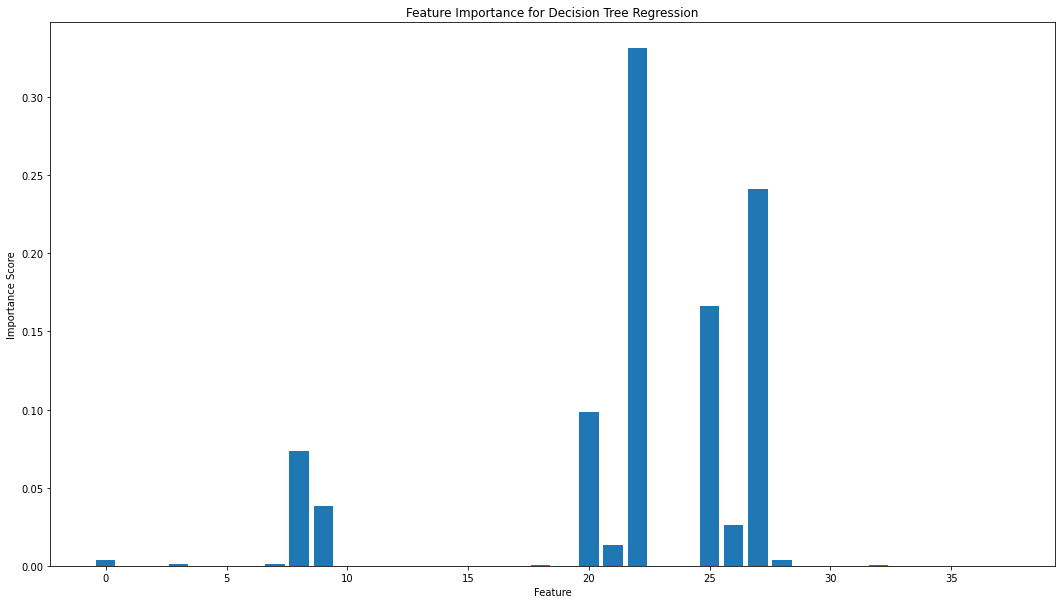

In [ ]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(df_sklearn, output)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(18, 10))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xlabel('Feature')
pyplot.ylabel('Importance Score')
pyplot.title('Feature Importance for Decision Tree Regression')
pyplot.savefig('DTR')
pyplot.show()

Feature: 0, Score: 32.02196
Feature: 1, Score: -21.54318
Feature: 2, Score: -8.39135
Feature: 3, Score: -3.68377
Feature: 4, Score: 18.95830
Feature: 5, Score: -8.51438
Feature: 6, Score: 10.80202
Feature: 7, Score: -1.91063
Feature: 8, Score: -7.12139
Feature: 9, Score: 14.99958
Feature: 10, Score: -11.12960
Feature: 11, Score: -2.09977
Feature: 12, Score: 10.39384
Feature: 13, Score: 6.21595
Feature: 14, Score: 2.20581
Feature: 15, Score: -25.17167
Feature: 16, Score: -2.08053
Feature: 17, Score: 2.76593
Feature: 18, Score: -7.99239
Feature: 19, Score: -6.76958
Feature: 20, Score: 15.42311
Feature: 21, Score: 3.76222
Feature: 22, Score: -1.40862
Feature: 23, Score: 13.52671
Feature: 24, Score: 2.47524
Feature: 25, Score: 10.59453
Feature: 26, Score: -4.19396
Feature: 27, Score: -12.86176
Feature: 28, Score: 15.08924
Feature: 29, Score: 1.35739
Feature: 30, Score: -4.41499
Feature: 31, Score: 1.22361
Feature: 32, Score: -3.67595
Feature: 33, Score: 15.54831
Feature: 34, Score: 1.56288

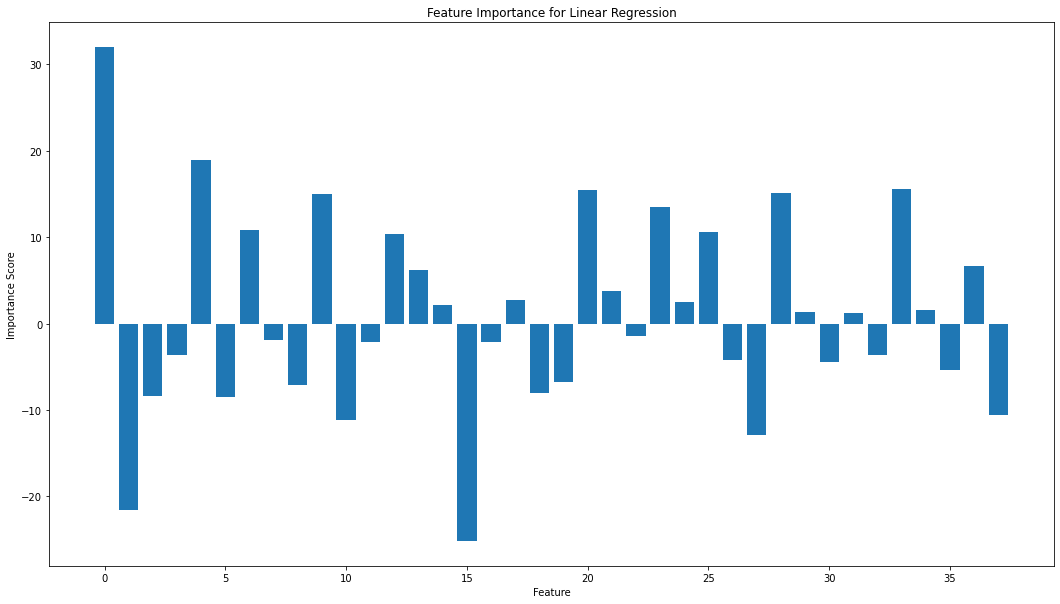

In [ ]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(df_sklearn, output)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
# plot feature importance
plt.figure(figsize=(18, 10))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xlabel('Feature')
pyplot.ylabel('Importance Score')
pyplot.title('Feature Importance for Linear Regression')
pyplot.savefig('DTR')
pyplot.show()

Feature: 0, Score: 0.02992
Feature: 1, Score: 0.00679
Feature: 2, Score: 0.01736
Feature: 3, Score: 0.01163
Feature: 4, Score: 0.05923
Feature: 5, Score: 0.00002
Feature: 6, Score: 0.00363
Feature: 7, Score: 0.03351
Feature: 8, Score: 0.00650
Feature: 9, Score: 0.10732
Feature: 10, Score: 0.01762
Feature: 11, Score: 0.04091
Feature: 12, Score: 0.03118
Feature: 13, Score: 0.00407
Feature: 14, Score: 0.00250
Feature: 15, Score: 0.03695
Feature: 16, Score: 0.00657
Feature: 17, Score: 0.00435
Feature: 18, Score: 0.03281
Feature: 19, Score: 0.04215
Feature: 20, Score: 0.08078
Feature: 21, Score: 0.01684
Feature: 22, Score: 0.09769
Feature: 23, Score: 0.11317
Feature: 24, Score: 0.01381
Feature: 25, Score: 0.05442
Feature: 26, Score: 0.01169
Feature: 27, Score: 0.04451
Feature: 28, Score: 0.01188
Feature: 29, Score: 0.00123
Feature: 30, Score: 0.00313
Feature: 31, Score: 0.02138
Feature: 32, Score: 0.01596
Feature: 33, Score: 0.00124
Feature: 34, Score: 0.00598
Feature: 35, Score: 0.00014
Fe

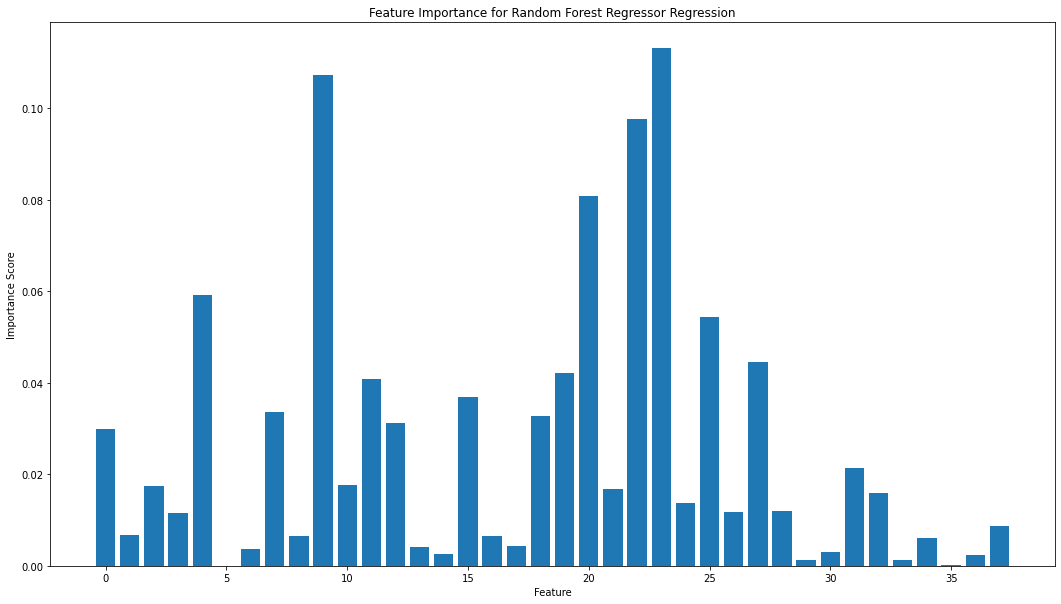

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(df_sklearn, output)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(18, 10))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xlabel('Feature')
pyplot.ylabel('Importance Score')
pyplot.title('Feature Importance for Random Forest Regressor Regression')
pyplot.savefig('LR')
pyplot.show()

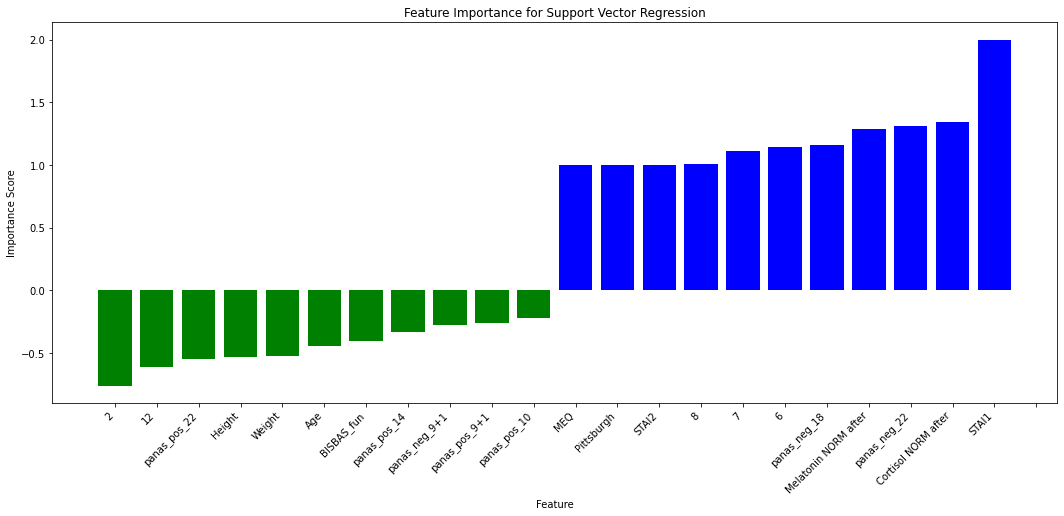

In [ ]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
def feature_plot(classifier, feature_names, top_features=11):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 plt.figure(figsize=(18, 7))
 colors = ['green' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1 + 2 * top_features), feature_names[top_coefficients], rotation=45, ha='right')
 pyplot.xlabel('Feature')
 pyplot.ylabel('Importance Score')
 pyplot.title('Feature Importance for Support Vector Regression')
 pyplot.savefig('SVR')
 plt.show()

#trainedsvm = SVR.fit(X, y)
svm = SVR(kernel='linear', epsilon=1, C=1.0 ) #untuk data linear
svm.fit(df_sklearn, output)
feature_plot(svm, df_sklearn.columns.values)


#Bagi Training Set dan Test Set

In [ ]:
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_sklearn, output, test_size=0.2, random_state=0)

In [ ]:
X_train.head()

,Weight,Height,Age,MEQ,STAI1,STAI2,Pittsburgh,Daily_stress,BISBAS_bis,BISBAS_reward,BISBAS_drive,BISBAS_fun,panas_pos_10,panas_pos_14,panas_pos_18,panas_pos_22,panas_pos_9+1,panas_neg_10,panas_neg_14,panas_neg_18,panas_neg_22,panas_neg_9+1,Cortisol NORM before,Melatonin NORM before,Cortisol NORM after,Melatonin NORM after,1,2,3,4,5,6,7,8,9,10,11,12
22,0.581818,1.000000,0.60,0.5,0.5,1.0,1.0,0.484375,0.714286,0.636364,0.125,0.545455,0.1875,0.761905,0.541667,0.578947,0.318182,0.8750,0.263158,0.571429,0.176471,0.375,0.044494,0.049173,0.071952,0.029053,0.0,0.090909,0.500,0.0,0.0,0.2,0.142857,0.000000,0.0,0.0,0.5,0.000000
12,0.127273,0.027778,0.35,0.5,0.0,1.0,1.0,0.593750,0.142857,0.727273,0.250,0.272727,0.5625,0.666667,0.750000,0.473684,0.727273,0.2500,0.315789,0.285714,0.764706,0.375,1.000000,0.085382,0.528572,0.303158,1.0,0.272727,0.625,0.0,1.0,0.8,0.285714,0.666667,0.4,0.0,0.0,1.000000
20,0.181818,0.166667,0.45,0.5,0.5,1.0,1.0,0.187500,0.428571,0.727273,0.375,0.363636,0.4375,0.476190,0.708333,0.631579,0.772727,0.9375,1.000000,0.714286,0.588235,0.625,0.012542,0.145731,0.127949,0.162807,0.0,0.000000,0.125,0.0,0.5,0.4,0.285714,0.333333,1.0,0.0,0.5,0.666667
9,0.181818,0.166667,0.00,0.5,0.5,1.0,0.0,0.437500,0.142857,0.363636,0.750,0.454545,0.5000,1.000000,0.958333,0.578947,0.500000,0.0625,0.052632,0.214286,0.352941,0.625,0.097042,0.177023,0.264521,0.259298,0.5,0.090909,0.500,0.0,1.0,0.2,0.285714,0.333333,0.0,0.0,0.0,0.666667
7,0.090909,0.388889,0.25,0.5,0.5,1.0,0.0,0.921875,0.000000,0.454545,0.500,0.090909,0.0625,0.000000,0.041667,0.000000,0.000000,0.0625,0.157895,0.428571,0.235294,0.375,0.056966,0.383102,0.168930,0.428070,0.0,0.181818,0.500,0.0,0.0,0.0,0.000000,0.333333,0.0,0.0,0.0,0.666667


In [ ]:
y_train.head()

22    84.92
12    94.23
20    88.07
9     80.77
7      84.3
Name: Efficiency, dtype: object

In [ ]:
X_test.head()

,Weight,Height,Age,MEQ,STAI1,STAI2,Pittsburgh,Daily_stress,BISBAS_bis,BISBAS_reward,BISBAS_drive,BISBAS_fun,panas_pos_10,panas_pos_14,panas_pos_18,panas_pos_22,panas_pos_9+1,panas_neg_10,panas_neg_14,panas_neg_18,panas_neg_22,panas_neg_9+1,Cortisol NORM before,Melatonin NORM before,Cortisol NORM after,Melatonin NORM after,1,2,3,4,5,6,7,8,9,10,11,12
21,0.181818,0.166667,0.40,0.5,0.5,1.0,1.0,0.312500,0.571429,0.272727,0.250,0.181818,0.2500,0.333333,0.375000,0.263158,0.500000,0.0000,0.105263,0.285714,0.117647,0.375,0.102673,0.282826,0.208046,0.233314,0.0,0.454545,0.500,0.0,0.0,0.6,0.000000,0.000000,0.8,0.0,0.0,0.000000
11,1.000000,0.472222,0.35,1.0,0.5,1.0,0.0,0.109375,0.571429,0.454545,0.375,0.727273,0.1250,0.142857,0.416667,1.000000,0.000000,0.3125,0.263158,0.071429,0.176471,0.500,0.198770,0.018328,0.000000,0.338596,0.0,1.000000,1.000,0.0,0.0,0.6,0.285714,0.000000,0.8,0.0,0.5,0.666667
15,0.363636,0.305556,0.20,0.5,1.0,1.0,1.0,0.390625,0.857143,1.000000,1.000,1.000000,0.4375,0.761905,1.000000,0.368421,0.409091,0.1250,0.473684,0.857143,0.294118,0.125,0.059559,0.043809,0.111392,0.041754,0.0,0.000000,0.250,0.0,0.5,0.2,0.000000,0.000000,0.2,0.0,0.0,0.666667
14,0.072727,0.055556,0.35,0.0,0.5,1.0,1.0,0.250000,0.714286,0.000000,0.375,0.000000,0.2500,0.000000,0.416667,0.210526,0.227273,0.2500,0.157895,0.071429,0.176471,0.000,0.026231,0.200268,0.096315,0.149474,0.5,0.090909,0.875,0.0,0.0,0.4,1.000000,0.333333,0.0,0.0,0.0,0.333333
2,0.636364,0.388889,0.35,0.5,0.0,1.0,0.0,0.250000,1.000000,0.636364,0.500,0.090909,1.0000,0.904762,0.500000,0.842105,0.909091,0.0625,0.000000,0.428571,0.411765,1.000,0.063779,0.678140,1.000000,1.000000,1.0,0.454545,0.500,0.5,0.0,0.2,0.428571,0.333333,0.2,0.0,0.0,0.666667


In [ ]:
y_test.head()

21    91.92
11    75.08
15    89.39
14    90.78
2     92.02
Name: Efficiency, dtype: object

# **SVR**

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
svm = SVR(kernel='linear', epsilon=1, C=1.0 ) #untuk data linear
svm.fit(X_train, y_train)
svm.fit(X_test, y_test)

y_pred = svm.predict(X_train)
y_ptest = svm.predict(X_test)

mse_train= mean_squared_error(y_train, y_pred)
mse_test= mean_squared_error(y_test, y_ptest)

rmse_train= sqrt(mean_squared_error(y_train, y_pred))
rmse_test= sqrt(mean_squared_error(y_test, y_ptest))

r2_train = r2_score(y_train, y_pred)
r2_test = r2_score(y_test, y_ptest)

print('MSE train = ' , mse_train)
print('RMSE train = ', rmse_train)
print('MSE test = ' , mse_test)
print('RMSE test = ', rmse_test)
print('R2 Train = ' , r2_train)
print('R2 Test = ', r2_test)

MSE train =  99.26734479697986
RMSE train =  9.963299894963509
MSE test =  26.914192600248803
RMSE test =  5.1878890312196155
R2 Train =  -1.6052116693604712
R2 Test =  0.35296971648167663


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
svm = SVR(kernel='rbf', gamma='scale' ) #untuk data linear
svm.fit(X_train, y_train)
svm.fit(X_test, y_test)

y_pred = svm.predict(X_train)
y_ptest = svm.predict(X_test)

mse_trainrbf= mean_squared_error(y_train, y_pred)
mse_testrbf= mean_squared_error(y_test, y_ptest)

rmse_trainrbf= sqrt(mean_squared_error(y_train, y_pred))
rmse_testrbf= sqrt(mean_squared_error(y_test, y_ptest))

r2_train = r2_score(y_train, y_pred)
r2_test = r2_score(y_test, y_ptest)

print('MSE train = ' , mse_trainrbf)
print('RMSE train = ', rmse_trainrbf)
print('MSE test = ' , mse_testrbf)
print('RMSE test = ', rmse_testrbf)
print('R2 Train = ' , r2_train)
print('R2 Test = ', r2_test)

MSE train =  100.53145055391758
RMSE train =  10.026537316238223
MSE test =  43.849954887034
RMSE test =  6.621929846127487
R2 Train =  -1.6383873635025403
R2 Test =  -0.05417424792304604


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
svm = SVR(kernel='rbf', gamma='auto') #untuk data linear
svm.fit(X_train, y_train)
svm.fit(X_test, y_test)

y_pred = svm.predict(X_train)
y_ptest = svm.predict(X_test)

mse_trainrbfo= mean_squared_error(y_train, y_pred)
mse_testrbfo= mean_squared_error(y_test, y_ptest)

rmse_trainrbfo= sqrt(mean_squared_error(y_train, y_pred))
rmse_testrbfo= sqrt(mean_squared_error(y_test, y_ptest))

r2_train = r2_score(y_train, y_pred)
r2_test = r2_score(y_test, y_ptest)

print('MSE train = ' , mse_trainrbfo)
print('RMSE train = ', rmse_trainrbfo)
print('MSE test = ' , mse_testrbfo)
print('RMSE test = ', rmse_testrbfo)
print('R2 Train = ' , r2_train)
print('R2 Test = ', r2_test)

MSE train =  101.99159945846375
RMSE train =  10.099089041020667
MSE test =  48.8331879528719
RMSE test =  6.988074695713541
R2 Train =  -1.6767080919647297
R2 Test =  -0.17397359510454669


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
svm = SVR(kernel='poly') #untuk data linear
svm.fit(X_train, y_train)
svm.fit(X_test, y_test)

y_pred = svm.predict(X_train)
y_ptest = svm.predict(X_test)

mse_trainply= mean_squared_error(y_train, y_pred)
mse_testply= mean_squared_error(y_test, y_ptest)

rmse_trainply= sqrt(mean_squared_error(y_train, y_pred))
rmse_testply= sqrt(mean_squared_error(y_test, y_ptest))

r2_train = r2_score(y_train, y_pred)
r2_test = r2_score(y_test, y_ptest)

print('MSE train = ' , mse_trainply)
print('RMSE train = ', rmse_trainply)
print('MSE test = ' , mse_testply)
print('RMSE test = ', rmse_testply)
print('R2 Train = ' , r2_train)
print('R2 Test = ', r2_test)

MSE train =  98.4171307926301
RMSE train =  9.92054085182003
MSE test =  3.9678946135594466
RMSE test =  1.9919574828694127
R2 Train =  -1.582898314952577
R2 Test =  0.9046098831603642


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
svm = SVR(kernel='sigmoid') #untuk data linear
svm.fit(X_train, y_train)
svm.fit(X_test, y_test)

y_pred = svm.predict(X_train)
y_ptest = svm.predict(X_test)

mse_trainsgm= mean_squared_error(y_train, y_pred)
mse_testsgm= mean_squared_error(y_test, y_ptest)

rmse_trainsgm= sqrt(mean_squared_error(y_train, y_pred))
rmse_testsgm= sqrt(mean_squared_error(y_test, y_ptest))

r2_train = r2_score(y_train, y_pred)
r2_test = r2_score(y_test, y_ptest)

print('MSE train = ' , mse_trainsgm)
print('RMSE train = ', rmse_trainsgm)
print('MSE test = ' , mse_testsgm)
print('RMSE test = ', rmse_testsgm)
print('R2 Train = ' , r2_train)
print('R2 Test = ', r2_test)

MSE train =  101.84971256971399
RMSE train =  10.092061859189824
MSE test =  49.62639965177977
RMSE test =  7.044600744668201
R2 Train =  -1.672984356036705
R2 Test =  -0.19304279023357562


In [ ]:
from sklearn.svm import SVR
for i in range(1,20):
  svm = SVR(kernel='linear', epsilon=1, C=1.0, max_iter=i)
  svm.fit(X_train, y_train)
  y_ptest = svm.predict(X_test)
  y_ptrain = svm.predict(X_train)
  
  r2_train = r2_score(y_train, y_ptrain)
  r2_test = r2_score(y_test, y_ptest)
  mse_train = mean_squared_error(y_train,y_ptrain) #calculate rmse
  mse_test = mean_squared_error(y_test,y_ptest) #calculate rmse
  rmse_train = sqrt(mean_squared_error(y_train,y_ptrain)) #calculate rmse
  rmse_test = sqrt(mean_squared_error(y_test,y_ptest)) #calculate rmse
  print('   ',i , '   ',r2_train, '   ',r2_test,   '    ',  mse_train, '    ', mse_train, '    ', rmse_train, '    ', rmse_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider

    1     0.07673480574131919     -0.6237967306946592      35.179515528588645      35.179515528588645      5.931232209970256      8.218531146935776
    2     0.13501373015041662     -1.6701276279515276      32.95889209451077      32.95889209451077      5.7409835476606945      10.538878175383527
    3     0.1781644313099816     -1.8172799979543717      31.314704952016715      31.314704952016715      5.595954337913839      10.825385728268024
    4     0.4345765375715599     -1.3153703498036995      21.544539532545738      21.544539532545738      4.641609584243998      9.81383174372417
    5     0.5219967804366339     -1.1397205279314622      18.21353365199351      18.21353365199351      4.2677316752571866      9.434239576204272
    6     0.5623861972554118     -1.2829349396438143      16.674560749080484      16.674560749080484      4.083449613878012      9.744849618396076
    7     0.5855602186951361     -1.2894096871627543      15.791552430161657      15.791552430161657      3.973858632

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=16).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=17).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=18).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=19).  Con

In [ ]:
from sklearn.svm import SVR
for i in range(1,20):
  svm = SVR(kernel='rbf', gamma= 'scale', max_iter=i)
  svm.fit(X_train, y_train)
  y_ptest = svm.predict(X_test)
  y_ptrain = svm.predict(X_train)
  
  r2_train = r2_score(y_train, y_ptrain)
  r2_test = r2_score(y_test, y_ptest)
  mse_train = mean_squared_error(y_train,y_ptrain) #calculate rmse
  mse_test = mean_squared_error(y_test,y_ptest) #calculate rmse
  rmse_train = sqrt(mean_squared_error(y_train,y_ptrain)) #calculate rmse
  rmse_test = sqrt(mean_squared_error(y_test,y_ptest)) #calculate rmse
  print('   ',i , '   ',r2_train, '   ',r2_test,   '    ',  mse_train, '    ', mse_train, '    ', rmse_train, '    ', rmse_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider

    1     0.048613045199674465     -0.6885297610441317      36.251049382369835      36.251049382369835      6.020884435227921      8.38074706999043
    2     0.037172880098676364     -1.1058054116844787      36.68695822884523      36.68695822884523      6.056975997050444      9.359173381443032
    3     0.08482942532056503     -1.087793185760865      34.871083241790764      34.871083241790764      5.905174277004089      9.319060086743141
    4     0.1575831929686169     -0.8808988024349922      32.098919496581      32.098919496581      5.66559083384787      8.845269894802076
    5     0.19889587298721856     -0.7056272148286915      30.52476715413408      30.52476715413408      5.5249223663445335      8.423070438926224
    6     0.21551370413349213     -0.6709918323836599      29.891571781345007      29.891571781345007      5.4673185183730615      8.337110115128597
    7     0.14222677552147278     -0.3367915393445784      32.68405075616353      32.68405075616353      5.716996655252085

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=14).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


In [ ]:
from sklearn.svm import SVR
for i in range(1,20):
  svm = SVR(kernel='poly',  max_iter=i)
  svm.fit(X_train, y_train)
  y_ptest = svm.predict(X_test)
  y_ptrain = svm.predict(X_train)
  
  r2_train = r2_score(y_train, y_ptrain)
  r2_test = r2_score(y_test, y_ptest)
  mse_train = mean_squared_error(y_train,y_ptrain) #calculate rmse
  mse_test = mean_squared_error(y_test,y_ptest) #calculate rmse
  rmse_train = sqrt(mean_squared_error(y_train,y_ptrain)) #calculate rmse
  rmse_test = sqrt(mean_squared_error(y_test,y_ptest)) #calculate rmse
  print('   ',i , '   ',r2_train, '   ',r2_test,   '    ',  mse_train, '    ', mse_train, '    ', rmse_train, '    ', rmse_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider

    1     -0.8508542134856594     -3.343208707608282      70.52378336080687      70.52378336080687      8.397843970972959      13.441066313101542
    2     0.1292072983203476     -2.8562169704856952      33.180136716318074      33.180136716318074      5.760220196860366      12.665114045595498
    3     0.49640639238875084     -1.5848070116263768      19.18861368242394      19.18861368242394      4.380480987565628      10.369132775689996
    4     0.5718634140649026     -1.677307451788851      16.31344684812272      16.31344684812272      4.038990820504885      10.55303789006299
    5     0.6785058980809913     -2.047088826139571      12.250008796108247      12.250008796108247      3.5000012565866667      11.258251114989369
    6     0.701690028864653     -2.286392887308455      11.366615277114457      11.366615277114457      3.371441127635845      11.691981380046522
    7     0.8131572586032539     -2.1915092316318727      7.119338152510562      7.119338152510562      2.6682087910264  

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=14).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=16).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=17).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=18).  Con

In [ ]:
from sklearn.svm import SVR
for i in range(1,20):
  svm = SVR(kernel='sigmoid', max_iter=i)
  svm.fit(X_train, y_train)
  y_ptest = svm.predict(X_test)
  y_ptrain = svm.predict(X_train)
  
  r2_train = r2_score(y_train, y_ptrain)
  r2_test = r2_score(y_test, y_ptest)
  mse_train = mean_squared_error(y_train,y_ptrain) #calculate rmse
  mse_test = mean_squared_error(y_test,y_ptest) #calculate rmse
  rmse_train = sqrt(mean_squared_error(y_train,y_ptrain)) #calculate rmse
  rmse_test = sqrt(mean_squared_error(y_test,y_ptest)) #calculate rmse
  print('   ',i , '   ',r2_train, '   ',r2_test,   '    ',  mse_train, '    ', mse_train, '    ', rmse_train, '    ', rmse_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider

    1     -0.007502793690120635     -0.6775741997691198      38.38925196804016      38.38925196804016      6.195906065140123      8.353514738743172
    2     -0.11542704740996079     -1.242197833574215      42.501529765641926      42.501529765641926      6.51931973181573      9.657513821656094
    3     -0.16041742242199253     -1.3880014412496648      44.215814682061456      44.215814682061456      6.64949732551728      9.966568737481115
    4     -0.1793592772090129     -1.4440178943995732      44.937563188085555      44.937563188085555      6.703548551930205      10.08278634943339
    5     -0.2814529101884655     -1.6956647683798667      48.8276746848744      48.8276746848744      6.9876802076851225      10.589155242759173
    6     0.001956569745138914     -0.5303450909417986      38.0288183408108      38.0288183408108      6.1667510360651665      7.97853328964542
    7     -0.061239713702298415     -0.3052470352510721      40.43680972694044      40.43680972694044      6.358994395

Feature: 0, Score: 0.37815
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00183
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00678
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00053
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00125
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.41685
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.10887
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00006
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00009
Feature: 25, Score: 0.06102
Feature: 26, Score: 0.00692
Feature: 27, Score: 0.00153
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.01614
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

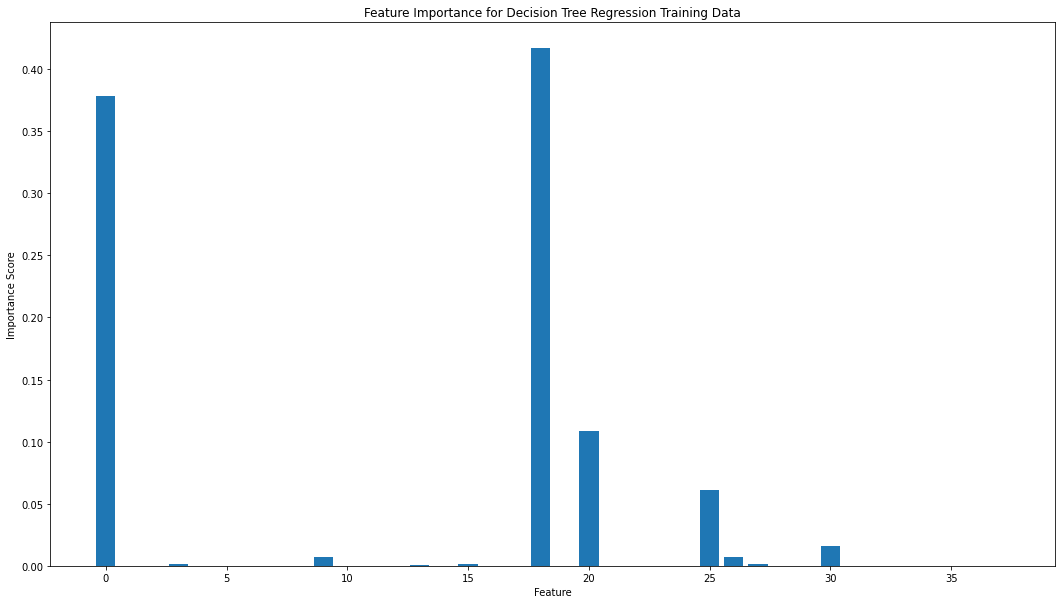

In [ ]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(18, 10))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xlabel('Feature')
pyplot.ylabel('Importance Score')
pyplot.title('Feature Importance for Decision Tree Regression Training Data')
pyplot.savefig('DTR training 1')
pyplot.show()


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.97825
Feature: 2, Score: 0.01721
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00454
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

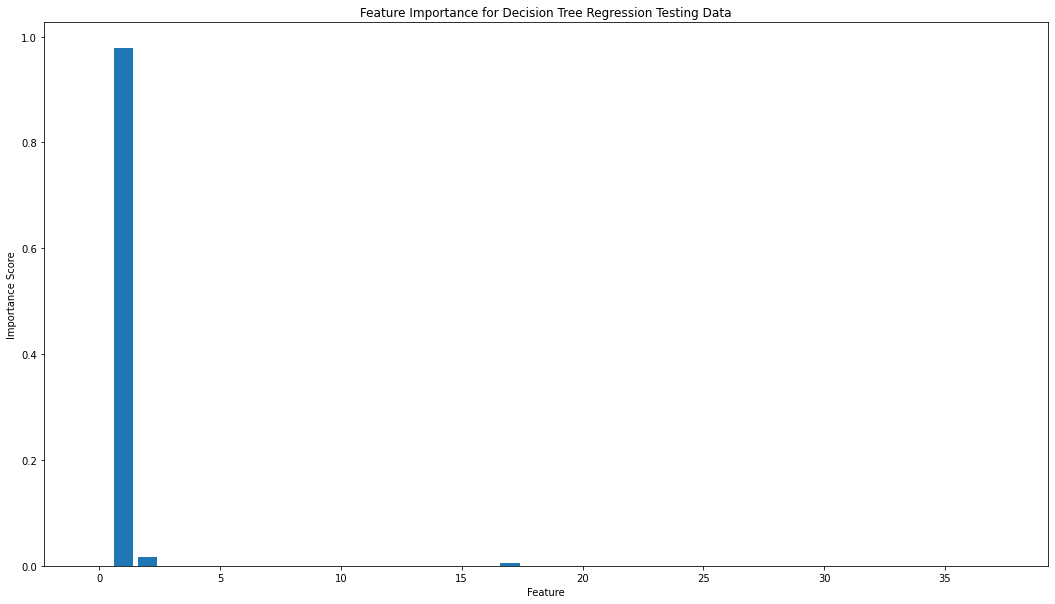

In [ ]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X_test, y_test)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(18, 10))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xlabel('Feature')
pyplot.ylabel('Importance Score')
pyplot.title('Feature Importance for Decision Tree Regression Testing Data')
pyplot.savefig('DTR testing 1')
pyplot.show()


Feature: 0, Score: 0.84833
Feature: 1, Score: -1.51836
Feature: 2, Score: 2.08037
Feature: 3, Score: 4.42964
Feature: 4, Score: 2.51567
Feature: 5, Score: -0.93000
Feature: 6, Score: 0.73754
Feature: 7, Score: -2.80559
Feature: 8, Score: -4.52798
Feature: 9, Score: 3.70218
Feature: 10, Score: -5.15868
Feature: 11, Score: 4.50254
Feature: 12, Score: -1.30946
Feature: 13, Score: -2.03366
Feature: 14, Score: 3.43443
Feature: 15, Score: -1.69658
Feature: 16, Score: -4.90538
Feature: 17, Score: 4.74625
Feature: 18, Score: 2.01001
Feature: 19, Score: -2.58364
Feature: 20, Score: 3.04048
Feature: 21, Score: -3.29128
Feature: 22, Score: 10.69013
Feature: 23, Score: 6.93077
Feature: 24, Score: 1.44575
Feature: 25, Score: 8.19350
Feature: 26, Score: -1.48008
Feature: 27, Score: -4.38429
Feature: 28, Score: 2.98728
Feature: 29, Score: 1.45738
Feature: 30, Score: 1.68832
Feature: 31, Score: -1.83321
Feature: 32, Score: 0.46548
Feature: 33, Score: 1.60504
Feature: 34, Score: -1.48339
Feature: 35, S

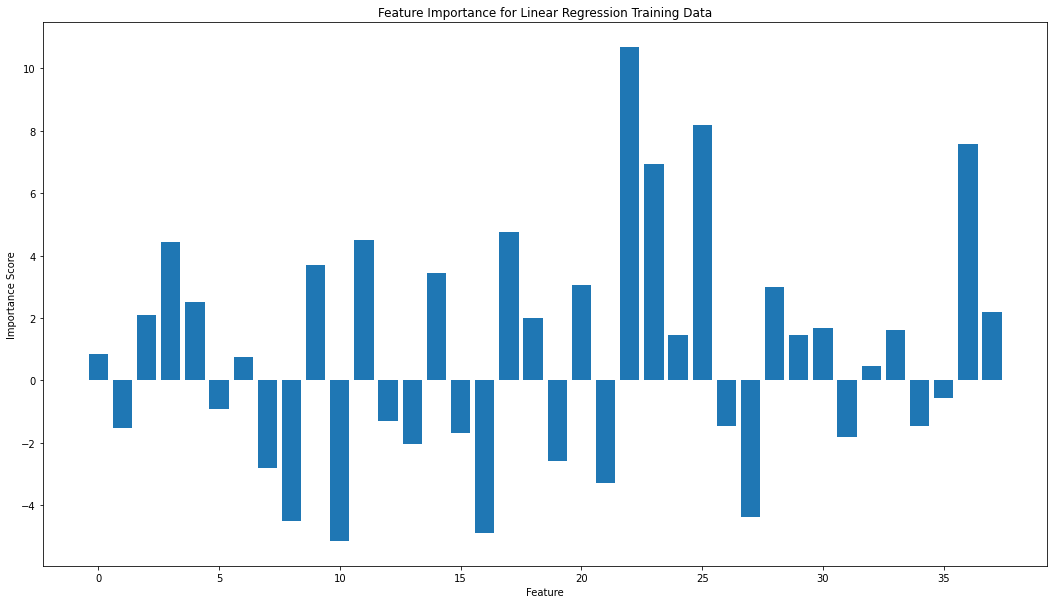

In [ ]:
from sklearn.linear_model import LinearRegression
# define the model
model = LinearRegression()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(18, 10))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xlabel('Feature')
pyplot.ylabel('Importance Score')
pyplot.title('Feature Importance for Linear Regression Training Data')
pyplot.savefig('LR training 1')
pyplot.show()


Feature: 0, Score: -2.63374
Feature: 1, Score: -0.90679
Feature: 2, Score: 0.15866
Feature: 3, Score: -1.75509
Feature: 4, Score: -0.52604
Feature: 5, Score: 0.00000
Feature: 6, Score: 2.79777
Feature: 7, Score: 0.73412
Feature: 8, Score: 0.39556
Feature: 9, Score: -0.23884
Feature: 10, Score: -0.26960
Feature: 11, Score: -2.13813
Feature: 12, Score: 1.25763
Feature: 13, Score: 1.42956
Feature: 14, Score: -0.05099
Feature: 15, Score: -2.20976
Feature: 16, Score: 2.43496
Feature: 17, Score: -1.21777
Feature: 18, Score: -0.73712
Feature: 19, Score: 1.03443
Feature: 20, Score: 0.05879
Feature: 21, Score: 0.29624
Feature: 22, Score: -0.38370
Feature: 23, Score: 1.45622
Feature: 24, Score: 1.66000
Feature: 25, Score: 0.42317
Feature: 26, Score: 0.87629
Feature: 27, Score: -1.96882
Feature: 28, Score: -2.03889
Feature: 29, Score: 0.52008
Feature: 30, Score: -0.00596
Feature: 31, Score: -0.34575
Feature: 32, Score: -0.97852
Feature: 33, Score: 0.23747
Feature: 34, Score: -0.35475
Feature: 35,

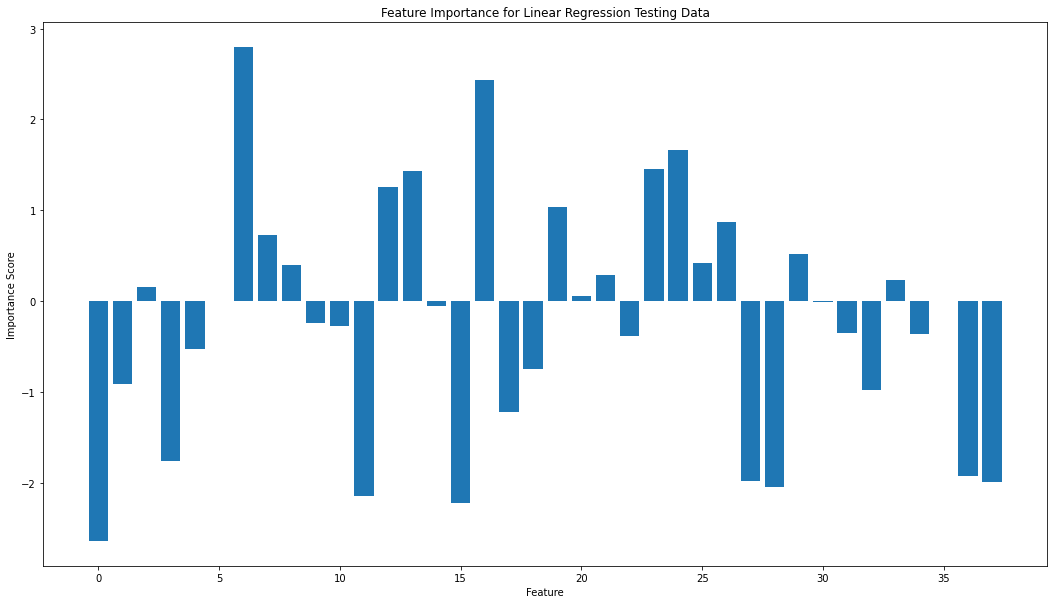

In [ ]:
from sklearn.linear_model import LinearRegression
# define the model
model = LinearRegression()
# fit the model
model.fit(X_test, y_test)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(18, 10))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xlabel('Feature')
pyplot.ylabel('Importance Score')
pyplot.title('Feature Importance for Linear Regression Testing Data')
pyplot.savefig('LR testing 1')
pyplot.show()


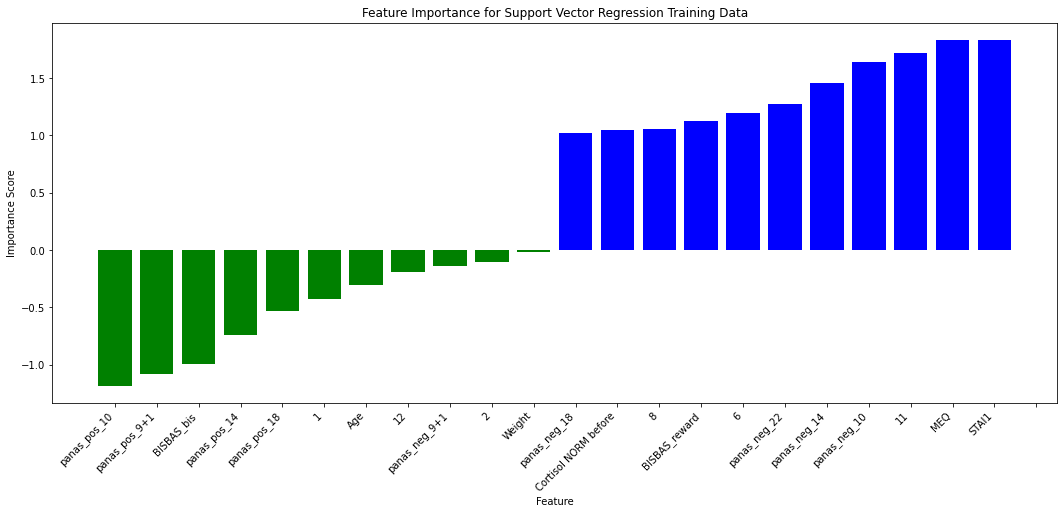

In [ ]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
def feature_plot(classifier, feature_names, top_features=11):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 plt.figure(figsize=(18, 7))
 colors = ['green' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1 + 2 * top_features), feature_names[top_coefficients], rotation=45, ha='right')
 pyplot.xlabel('Feature')
 pyplot.ylabel('Importance Score')
 pyplot.title('Feature Importance for Support Vector Regression Training Data')
 pyplot.savefig('SVR training   1')
 plt.show()

#trainedsvm = SVR.fit(X, y)
svm = SVR(kernel='linear', epsilon=1, C=1.0 ) #untuk data linear
svm.fit(X_train, y_train)
feature_plot(svm, df_sklearn.columns.values)



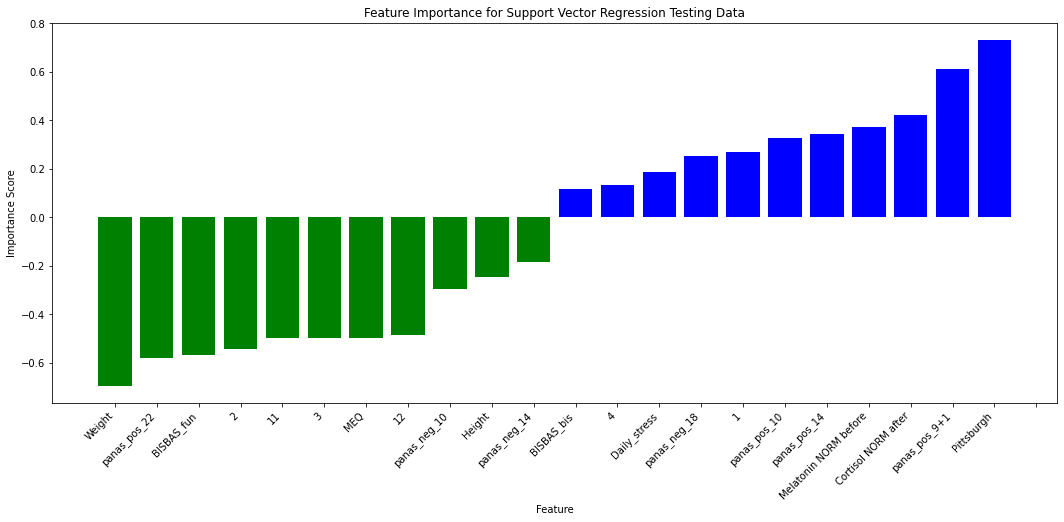

In [ ]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
def feature_plot(classifier, feature_names, top_features=11):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 plt.figure(figsize=(18, 7))
 colors = ['green' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1 + 2 * top_features), feature_names[top_coefficients], rotation=45, ha='right')
 pyplot.xlabel('Feature')
 pyplot.ylabel('Importance Score')
 pyplot.title('Feature Importance for Support Vector Regression Testing Data')
 pyplot.savefig('SVR testing 1')
 plt.show()

#trainedsvm = SVR.fit(X, y)
svm = SVR(kernel='linear', epsilon=1, C=1.0 ) #untuk data linear
svm.fit(X_test, y_test)
feature_plot(svm, df_sklearn.columns.values)



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


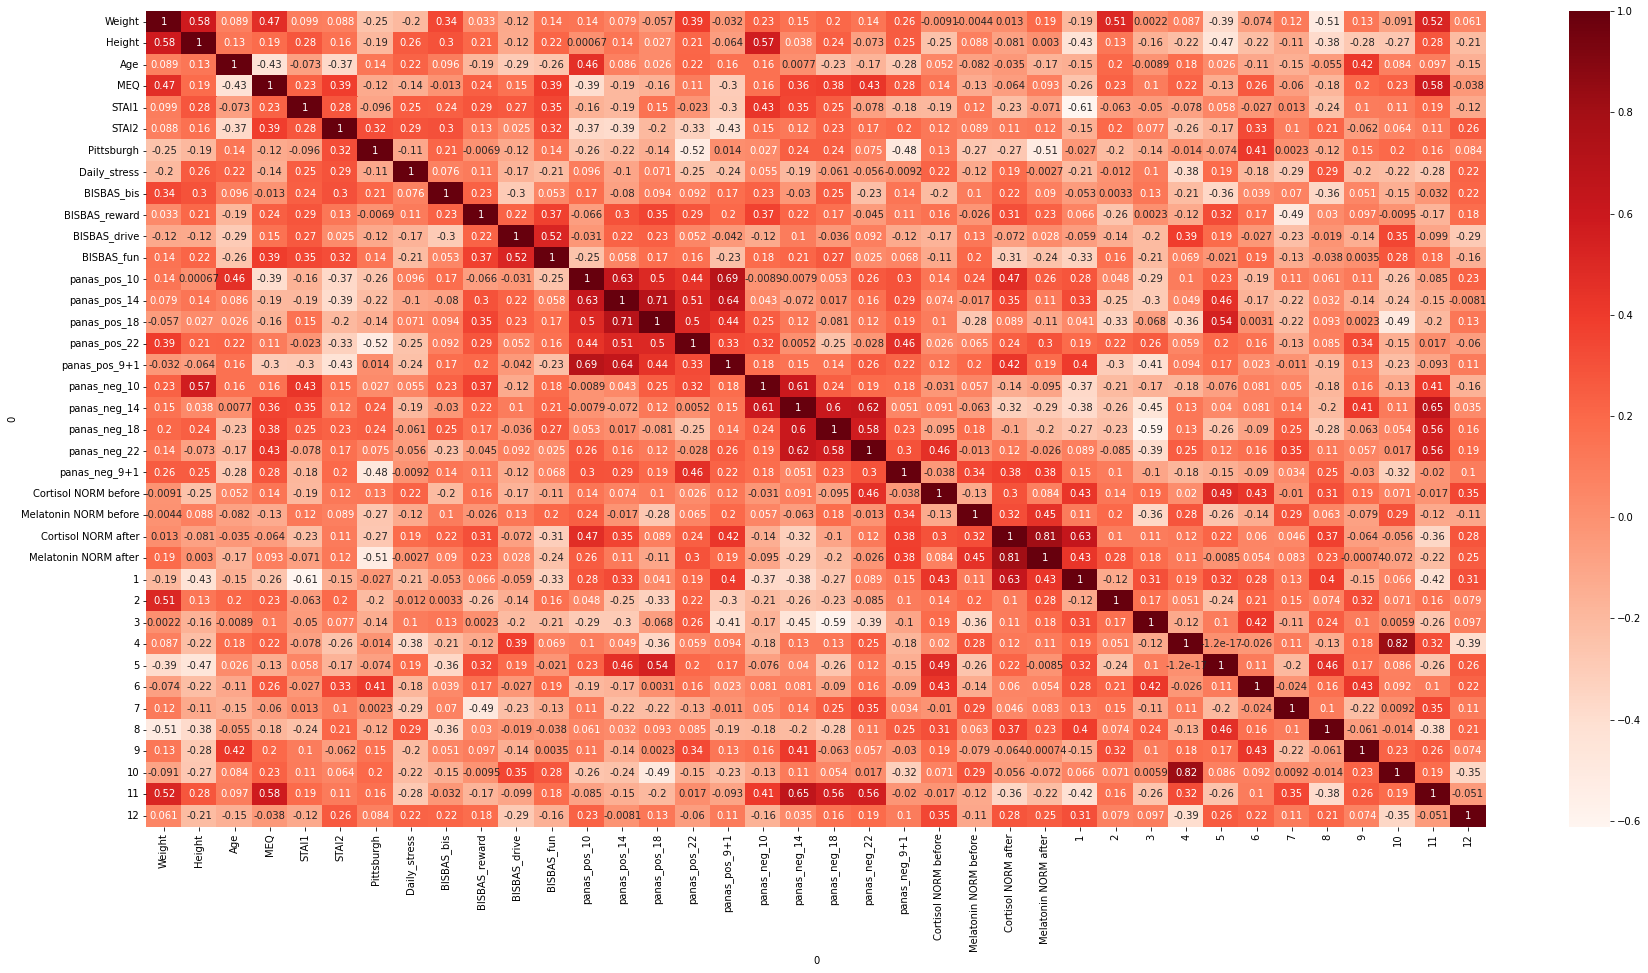

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

#Using Pearson Correlation
plt.figure(figsize=(30,15))
cor = df_sklearn.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
pyplot.savefig('correlation 1')
plt.show()
